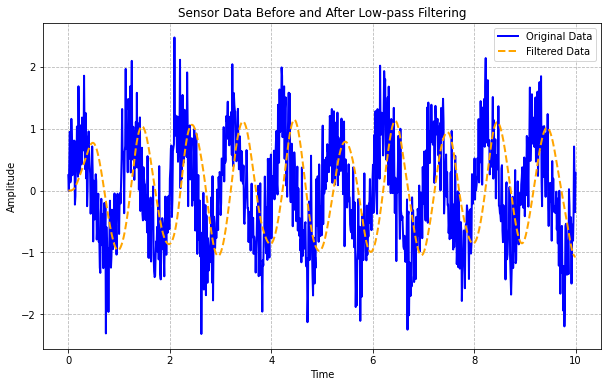

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Generate example data
np.random.seed(42)
time = np.linspace(0, 10, 1000)
sensor_data = np.sin(2 * np.pi * 1 * time) + 0.5 * np.random.normal(size=len(time))

# Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Set the cutoff frequency and filter the data
cutoff_frequency = 2.0  # Adjust this based on your specific application
filtered_data = butter_lowpass_filter(sensor_data, cutoff_frequency, sampling_rate=100)

# Clean and informative visualization
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(time, sensor_data, label='Original Data', color='blue', linestyle='-', linewidth=2)

# Plot filtered data
plt.plot(time, filtered_data, label='Filtered Data', color='orange', linestyle='--', linewidth=2)

# Add labels and title
plt.title('Sensor Data Before and After Low-pass Filtering')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [3]:
### Random Seed
from numpy.random import seed
seed(1)

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import csv

In [5]:
df = pd.read_csv('belt_sensor_all.csv')
print(df.shape)
df.head(2)

(108170, 22)


,Unnamed: 0,Pid,timestamp,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,...,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,0,P1_BS,3.00,-84.23,-994.63,8.06,-0.37,-2.62,1.65,311.28,...,2.08,-3.23,-4.33,-68.12,-970.46,150.15,1.83,0.24,0.61,Downstairs
1,1,P1_BS,3.01,-86.43,-1004.15,16.85,-0.18,-3.17,0.85,301.76,...,6.77,3.05,-3.78,-73.24,-978.52,140.62,0.55,-0.24,0.31,Downstairs


In [6]:
df.groupby('Pid').size()

Pid
P1_BS            12278
P2_BS            13016
P3_BS            13016
P4_BS            12946
P5_BS            13016
p10_all_BS123     8825
p11_all_BS123     8598
p6_all_BS123      8825
p7_all_BS123      8825
p8_all_BS123      8825
dtype: int64

In [7]:
### Low Pass filter 
from scipy import signal
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [8]:
#low pass filter
lowpass_filtred=[]
dfm=df[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
for column in dfm.columns:# iterate over each column in raw_df
    cutoff_frequency = 15.0
    sample_rate=100
    t_signal=np.array(dfm[column]) #copie the signal values in 1D numpy array
    y = butter_lowpass_filter(t_signal,cutoff_frequency,sample_rate/2) 
    lowpass_filtred.append(y)
lowpass=pd.DataFrame(lowpass_filtred)
lowpass=lowpass.T
lowpass.columns=['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']
df1=df[['Pid','timestamp']]
df_filtred=pd.concat([df1,lowpass],axis=1)
df_filtred['Label']=df['Label']

In [9]:
# Plotting function with dynamic subplot layout
def plot_sensor_data(original_data, filtered_data, column_names, title):
    num_plots = original_data.shape[1]
    num_rows = (num_plots // 2) + (num_plots % 2)  # Calculate the number of rows dynamically
    num_cols = 2

    plt.figure(figsize=(24, 40))
    plt.savefig('Sensor Data Before and After Low-pass Filtering',dpi=1200, bbox_inches='tight')
    for i in range(num_plots):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.plot(df1['timestamp'], original_data.iloc[:, i], label='Original', color='blue', linestyle='-', linewidth=2)
        plt.plot(df1['timestamp'], filtered_data.iloc[:, i], label='Filtered', color='orange', linestyle='--', linewidth=2)
        plt.title(column_names[i])
        plt.xlabel('Timestamp')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout for the suptitle
    plt.show()
   

# Plot original and filtered sensor data
plot_sensor_data(dfm, df_filtred.iloc[:, 2:-1], column_names, 'Sensor Data Before and After Low-pass Filtering')


NameError: name 'column_names' is not defined

In [10]:
df_filtred['Label'].value_counts()

Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64

In [11]:
import matplotlib.pyplot as plt

# Assuming 'data' is your time series data
segment_size = 100  # Choose your desired segmentation size

# Segment the time series data
segments = [data[i:i+segment_size] for i in range(0, len(data), segment_size)]

# Plot the segmented signals
for i, segment in enumerate(segments):
    plt.plot(segment, label=f'Segment {i + 1}')

# Add labels, title, legend, etc.
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Time Series Segmentation')
plt.legend()
plt.show()


NameError: name 'data' is not defined

Class Counts:
 Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64


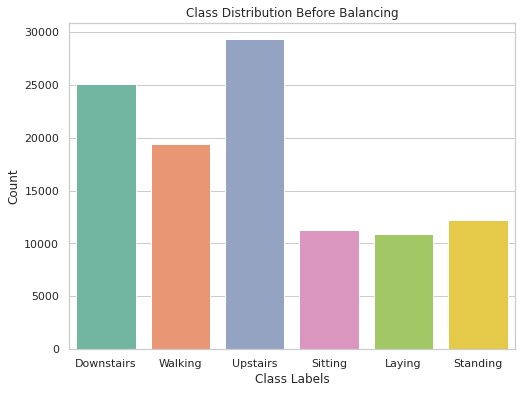

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_filtred['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_filtred, palette="Set2")
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [13]:
from imblearn.over_sampling import SMOTE
# split data into input and output elements
X = df_filtred[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy',
       'S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = df_filtred[['Label']]

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

df_Smoted=pd.concat([Xo,yo],axis=1)
print(df_Smoted.shape)
df_Smoted.head(2)

(176070, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs


/tmp/ipykernel_3729609/2936546722.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_values = segments[segment_of_interest - 1].mean(axis=1)


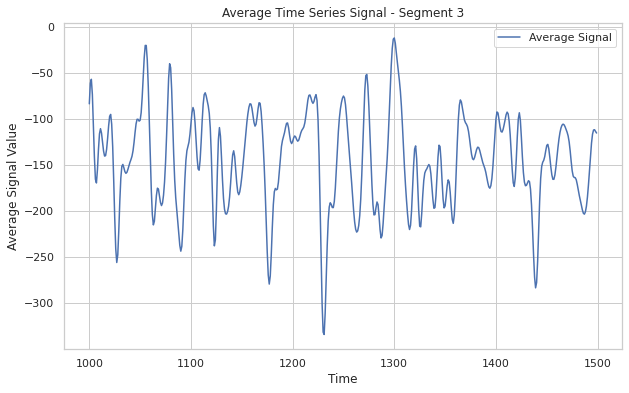

In [35]:
import matplotlib.pyplot as plt

# Assuming 'data' is your time series data
segment_size = 500  # Choose your desired segmentation size
segment_of_interest = 3  # Choose the segment you want to visualize

# Segment the time series data
segments = [df_Smoted[i:i+segment_size] for i in range(0, len(df_Smoted), segment_size)]

# Calculate the average across attributes for each time step in the segment of interest
average_values = segments[segment_of_interest - 1].mean(axis=1)

# Set the width and height of the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the average of all attributes for the segment of interest
ax.plot(average_values, label=f'Average Signal')

# Add labels, title, legend, etc.
ax.set_xlabel('Time')
ax.set_ylabel('Average Signal Value')
ax.set_title(f'Average Time Series Signal - Segment {segment_of_interest}')
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Label encoding
df_filtred['Label_id']=df_filtred['Label']
dff=df_filtred.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
## Normalize/Standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = dff[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = dff['Label_id']
scaler = StandardScaler()
dx = scaler.fit_transform(X)

df_scaled = pd.DataFrame(data = dx, columns = X.columns)
df_scaled['Label_id'] = y.values

print(df_scaled.shape)
df_scaled.tail(2)

Class Counts:
 Downstairs    29345
Walking       29345
Upstairs      29345
Sitting       29345
Laying        29345
Standing      29345
Name: Label, dtype: int64


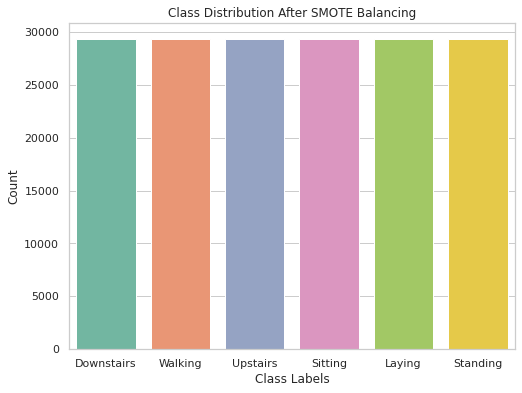

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_Smoted['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_Smoted, palette="Set2")
plt.title('Class Distribution After SMOTE Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [15]:
df_Smoted['Label_id']=df_Smoted['Label']
dff=df_Smoted.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
dff.head(2)

,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label,Label_id
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs,0
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs,0


In [16]:
# Label encoding
df_filtred['Label_id']=df_filtred['Label']
dff=df_filtred.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
## Normalize/Standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = dff[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = dff['Label_id']
scaler = StandardScaler()
dx = scaler.fit_transform(X)

df_scaled = pd.DataFrame(data = dx, columns = X.columns)
df_scaled['Label_id'] = y.values

print(df_scaled.shape)
df_scaled.tail(2)

(108170, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label_id
108168,-1.184801,-1.246834,1.052031,-1.358904,1.442018,0.213337,-0.374825,0.984964,0.103477,-0.647672,0.728023,0.554009,-0.495231,-0.095276,0.177837,0.934893,3.810924,-1.627844,5
108169,-0.948608,-2.459766,0.808399,-2.407089,1.100033,0.209530,-0.625947,0.657764,0.264402,-0.508701,1.039492,0.488135,-0.641922,-0.120628,0.178026,0.853266,3.767479,-1.420029,5


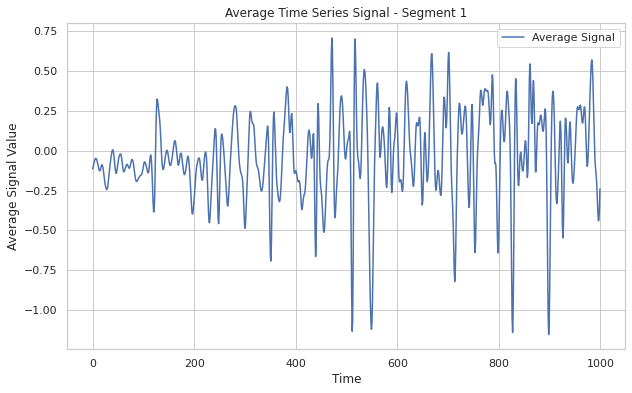

In [31]:
import matplotlib.pyplot as plt

# Assuming 'data' is your time series data
segment_size = 1000  # Choose your desired segmentation size
segment_of_interest = 1  # Choose the segment you want to visualize

# Segment the time series data
segments = [df_scaled[i:i+segment_size] for i in range(0, len(df_scaled), segment_size)]

# Calculate the average across attributes for each time step in the segment of interest
average_values = segments[segment_of_interest - 1].mean(axis=1)

# Set the width and height of the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the average of all attributes for the segment of interest
ax.plot(average_values, label=f'Average Signal')

# Add labels, title, legend, etc.
ax.set_xlabel('Time')
ax.set_ylabel('Average Signal Value')
ax.set_title(f'Average Time Series Signal - Segment {segment_of_interest}')
ax.legend()

# Show the plot
plt.show()


In [13]:
## Segmentation (window Preparation)
import scipy.stats as stats
Fs = 100
segment_size = 500 # fs*3 # window size=n_time steps=frame size
step_size = 50  #  Fs/2 # step size is related to window overlap
n_features = 18
def get_segments(df, segment_size, step_size):

    segments = []
    labels = []
    
    for i in range(0, len(df) - segment_size - 1, step_size):
        S1Ax = df_scaled['S1_Ax'].values[i: i + segment_size]
        S1Ay = df_scaled['S1_Ay'].values[i: i + segment_size]
        S1Az = df_scaled['S1_Az'].values[i: i + segment_size]
        S1Gx = df_scaled['S1_Gx'].values[i: i + segment_size]
        S1Gy = df_scaled['S1_Gy'].values[i: i + segment_size]
        S1Gz = df_scaled['S1_Gz'].values[i: i + segment_size]
        
        S2Ax = df_scaled['S2_Ax'].values[i: i + segment_size]
        S2Ay = df_scaled['S2_Ay'].values[i: i + segment_size]
        S2Az = df_scaled['S2_Az'].values[i: i + segment_size]
        S2Gx = df_scaled['S2_Gx'].values[i: i + segment_size]
        S2Gy = df_scaled['S2_Gy'].values[i: i + segment_size]
        S2Gz = df_scaled['S2_Gz'].values[i: i + segment_size]
        
        
        S3Ax = df_scaled['S3_Ax'].values[i: i + segment_size]
        S3Ay = df_scaled['S3_Ay'].values[i: i + segment_size]
        S3Az = df_scaled['S3_Az'].values[i: i + segment_size]
        S3Gx = df_scaled['S3_Gx'].values[i: i + segment_size]
        S3Gy = df_scaled['S3_Gy'].values[i: i + segment_size]
        S3Gz = df_scaled['S3_Gz'].values[i: i + segment_size]
        
          # Retrieve the most often used label in this segment
        # label = stats.mode(df_scaled['Label_id'][i: i + segment_size])[0][0] ## [0][0] shows the current sequence
        label = np.unique(df_scaled['Label_id'][i: i + segment_size])[0]

        #We used the dstack() to ensure that each array is stacked in such a way that
        #the features are separated in the third dimension, as we would prefer.
        segments.append(np.dstack([S1Ax, S1Ay, S1Az,S1Gx,S1Gy,S1Gz,S2Ax,S2Ay,S2Az, S2Gx,S2Gy,S2Gz,S3Ax,S3Ay,S3Az,S3Gx,S3Gy,S3Gz]))
        labels.append(label)

    # Bring the segments into a better shape
    segments=np.asarray(segments, dtype= np.float32).reshape(-1, segment_size, n_features)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
        
    return segments, labels


In [14]:
X, y = get_segments(df_scaled, segment_size, step_size)

In [15]:
X.shape,y.shape, y.shape[0]

((2154, 500, 18), (2154, 6), 2154)

In [16]:
# # reshape data into time steps of sub-sequences

# n_steps, n_length = 10, 50
# df_X = X.reshape((X.shape[0], n_steps, n_length, n_features))
# n_outputs = y.shape[1] #n_outputs= 6

In [18]:
from sklearn.model_selection import train_test_split
# split data into training set and test set
X_train_main, X_test, y_train_main, y_test = train_test_split(X, y,test_size=0.15, random_state=42)

# split training set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_main,y_train_main,test_size=0.15,random_state=42)

In [19]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("y_valid",y_valid.shape)
print("X_valid",X_valid.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (1555, 500, 18)
y_train (1555, 6)
y_valid (275, 6)
X_valid (275, 500, 18)
X_test (324, 500, 18)
y_test (324, 6)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D  # Updated import
from keras.layers import MaxPooling1D  # Updated import

2023-12-05 13:52:20.655942: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 13:52:21.419114: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 13:52:23.641792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 13:52:23.643637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 13:52:23.846030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling3D


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling1D, Flatten, LSTM, Bidirectional, Reshape, GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

# Assuming your segment shape is (128, 18)
input_shape = (500, 18)
n_outputs = 6  # Replace with your actual number of output classes

def create_cnn_transformer_model(input_shape):
    input_layer = Input(shape=input_shape)

    # 1D CNN Branch
    cnn_branch = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_branch = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_branch)
    cnn_branch = Dropout(0.2)(cnn_branch)
    cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
    cnn_branch = GlobalMaxPooling1D()(cnn_branch)  # Use GlobalMaxPooling1D to reduce dimensions

    # Transformer Encoder Branch
    transformer_branch = LayerNormalization(epsilon=1e-6)(input_layer)

    num_transformer_blocks = 3
    d_model = 128
    num_heads = 6
    ffn_units = 1012
    ff_dim = 245
    mlp_dropout = 0.3
    dropout_rate = 0.2

    for _ in range(num_transformer_blocks):
        transformer_branch = MultiHeadAttention(key_dim=d_model, num_heads=num_heads, dropout=dropout_rate)(transformer_branch, transformer_branch)
        transformer_branch = Dropout(dropout_rate)(transformer_branch)

        transformer_branch = TimeDistributed(Dense(64, activation="relu"))(transformer_branch)  # Adjust the dimension as needed
        transformer_branch = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(transformer_branch)
        transformer_branch = Dropout(mlp_dropout)(transformer_branch)
        transformer_branch = LayerNormalization(epsilon=1e-6)(transformer_branch + transformer_branch)

    transformer_branch = Dense(6, activation="relu")(transformer_branch)

    # Flatten both branches
    cnn_branch_flatten = Flatten()(cnn_branch)
    transformer_branch_flatten = Flatten()(transformer_branch)

    # Combine CNN and Transformer branches
    merged = Concatenate(axis=-1)([cnn_branch_flatten, transformer_branch_flatten])

    return Model(inputs=input_layer, outputs=merged)

def create_bilstm_model(input_shape, n_outputs):
    input_layer = Input(shape=input_shape)

    # BiLSTM Branch
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(input_layer)
    bilstm_branch = Bidirectional(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(bilstm_branch)
    bilstm_output = layers.Dense(352, activation='relu')(bilstm_branch)
    bilstm_output = layers.Dense(100, activation='relu')(bilstm_output)
    bilstm_output = layers.Dense(32, activation='relu')(bilstm_output)

    # Output Layer
    output_layer = Dense(n_outputs, activation='softmax')(bilstm_branch)

    return Model(inputs=input_layer, outputs=output_layer)

def create_combined_model(input_shape, n_outputs=n_outputs):
    input_layer = Input(shape=input_shape)

    # CNN + Transformer Branch
    cnn_transformer_model = create_cnn_transformer_model(input_shape)
    cnn_transformer_output = cnn_transformer_model(input_layer)

    # BiLSTM Branch
    bilstm_model = create_bilstm_model(input_shape, n_outputs)
    bilstm_output = bilstm_model(input_layer)
    
    # Concatenate the outputs of both branches
    merged = Concatenate(axis=-1)([cnn_transformer_output, bilstm_output])

    # Shared output layer
    output_layer = Dense(n_outputs, activation='softmax')(merged)

    # Create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with the desired optimizer, loss, and metrics
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Create the combined model
combined_model = create_combined_model(input_shape, n_outputs)

# Display the summary of the combined model
combined_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 500, 18)]            0         []                            
                                                                                                  
 model_1 (Functional)        (None, 3064)                 1667329   ['input_4[0][0]']             
                                                                                                  
 model_2 (Functional)        (None, 6)                    546310    ['input_4[0][0]']             
                                                                                                  
 concatenate_2 (Concatenate  (None, 3070)                 0         ['model_1[0][0]',             
 )                                                                   'model_2[0][0]']       

In [ ]:


# Training the combined model
history = combined_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[reduce_lr]
)


Epoch 1/20
49/49 [==============================] - 99s 2s/step - loss: 1.4620 - accuracy: 0.4186 - val_loss: 1.1334 - val_accuracy: 0.6109 - lr: 0.0010
Epoch 2/20
49/49 [==============================] - 86s 2s/step - loss: 0.9999 - accuracy: 0.6418 - val_loss: 0.8347 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 3/20
49/49 [==============================] - 86s 2s/step - loss: 0.7570 - accuracy: 0.7389 - val_loss: 0.6655 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 4/20
49/49 [==============================] - 86s 2s/step - loss: 0.6028 - accuracy: 0.7865 - val_loss: 0.5602 - val_accuracy: 0.8109 - lr: 0.0010
Epoch 5/20
49/49 [==============================] - 86s 2s/step - loss: 0.4778 - accuracy: 0.8418 - val_loss: 0.4631 - val_accuracy: 0.8509 - lr: 0.0010
Epoch 6/20
49/49 [==============================] - 86s 2s/step - loss: 0.3937 - accuracy: 0.8752 - val_loss: 0.4288 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 7/20
49/49 [==============================] - 86s 2s/step - loss: 0.3341 - a

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = combined_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history, 10)